In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# since The original User file was 2.5 GB, we plan to perform EDA only on Users in PA state.

user = pd.read_csv("output files/user_PA.csv")

In [3]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,is_elite,year
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,56,18,232,844,467,467,239,180,True,2007
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,True,2009
2,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,...,361,147,1212,5696,2543,2543,815,323,True,2005
3,AUi8MPWJ0mLkMfwbui27lg,John,109,2010-01-07 18:32:04,154,20,23,NaN,"gy5fWeSv3Gamuq9Ox4MV4g, lMr3LWU6kPFLTmCpDkACxg...",4,...,0,0,1,6,3,3,0,0,True,2010
4,1McG5Rn_UDkmlkZOrsdptg,Teresa,7,2009-05-26 16:11:11,18,3,13,NaN,"piejMEdRkGB7-1aL4lL5NQ, X0zFOU6iG95-feQKOXkgrA...",1,...,0,0,1,0,2,2,0,0,True,2009


In [4]:
user.shape

(280432, 24)

In [5]:
user['yelping_since'] = user['yelping_since'].apply(lambda x: str(x)[:10])

In [6]:
acct_created_perdate = user.groupby('yelping_since').size()

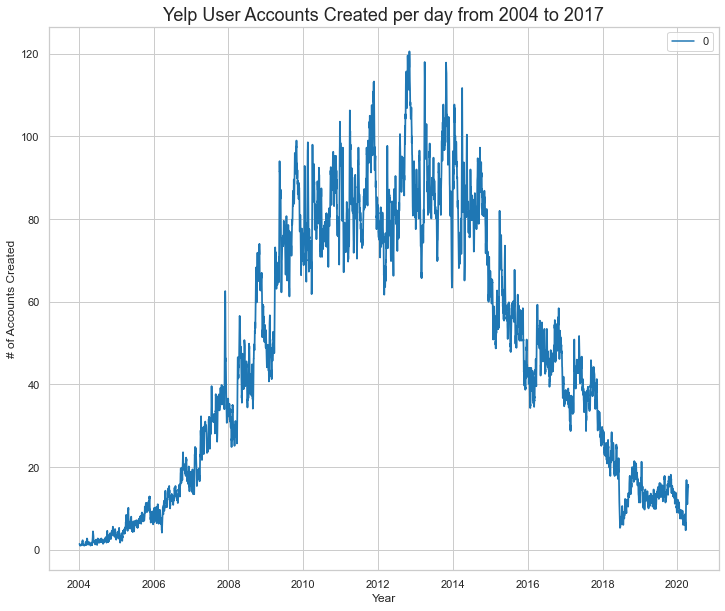

In [7]:
values = acct_created_perdate.tolist()
dates = pd.date_range('1 1 2004', periods = 5952, freq = 'D')

data = pd.DataFrame(values, dates)
data = data.rolling(7).mean()

fig = plt.figure(figsize=(12,10))
sns.set(style = 'whitegrid')
sns.lineplot(data=data, palette = 'tab10', linewidth = 1.75)
plt.title('Yelp User Accounts Created per day from 2004 to 2017',fontsize = 18)
plt.xlabel('Year')
plt.ylabel('# of Accounts Created')
plt.show()

#### Through the graph it could be observed that most of the users account were created between 2010 to 2014 

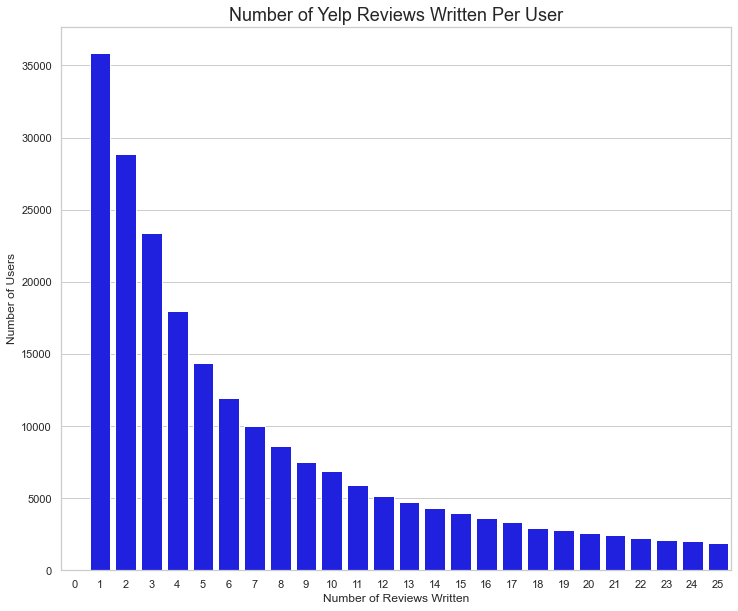

In [8]:
plt.figure(figsize=(12,10))
sns.set(style = 'whitegrid')

review_df = pd.DataFrame(list(user.groupby(['review_count']).size())[0:50],list(range(50)))
ax = sns.barplot(x = list(range(26)), y = list(user.groupby(['review_count']).size())[0:26], color = 'blue')
plt.title('Number of Yelp Reviews Written Per User', fontsize = 18)
plt.xlabel('Number of Reviews Written')
plt.ylabel('Number of Users')
plt.show()

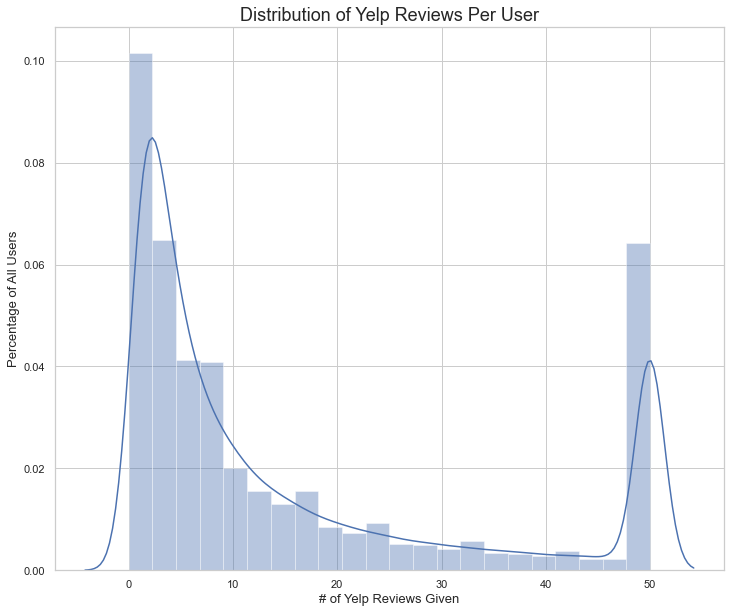

In [10]:
temp_user_review_count = list(user['review_count'])
counter = 0
max_50 = []
for i in temp_user_review_count:
    if i > 50:
        max_50.append(50)
    else:
        max_50.append(i)

plt.figure(figsize=(12, 10))        
ax = sns.distplot(max_50, bins = 22)
plt.title('Distribution of Yelp Reviews Per User', fontsize = 18)
plt.xlabel('# of Yelp Reviews Given', fontsize = 13)
plt.ylabel('Percentage of All Users', fontsize = 13)
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

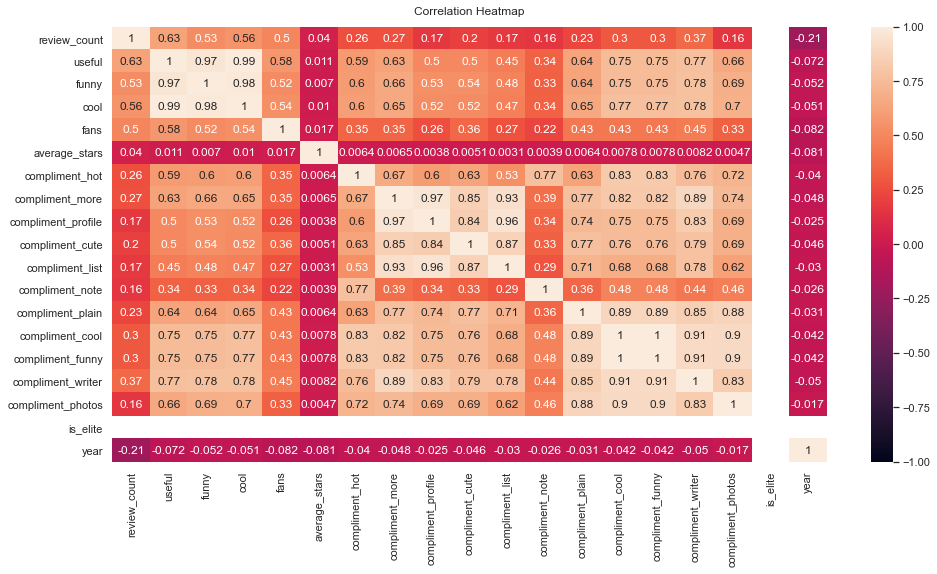

In [11]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(user.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)